In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
from pprint import pprint

In [27]:
ddf = pd.read_csv('district_data.csv')
sdf = pd.read_csv('school_data.csv')

In [28]:
ddf.head()

,corp1,treatment
0,29,1
1,129,1
2,239,0
3,259,1
4,369,1


In [29]:
ddf.shape

(156, 2)

In [30]:
ddf['treatment'].value_counts()

1    88
0    68
Name: treatment, dtype: int64

There is 88 districts that have been treated and 68 that have not, out of 156 districts.

In [31]:
ddf['corp1'].value_counts()

5374    1
5459    1
2654    1
3164    1
3419    1
5284    1
1624    1
1879    1
5629    1
4219    1
5619    1
3409    1
3029    1
3149    1
2124    1
1604    1
3139    1
2114    1
2399    1
1129    1
4349    1
4684    1
4734    1
5344    1
2819    1
1659    1
1914    1
3449    1
5624    1
4419    1
       ..
4149    1
399     1
3009    1
1164    1
5259    1
3464    1
2439    1
3714    1
4229    1
3459    1
3484    1
3999    1
1184    1
4594    1
5489    1
4539    1
5524    1
5304    1
1974    1
2739    1
4529    1
944     1
6059    1
4744    1
2984    1
4519    1
3494    1
4004    1
674     1
5639    1
Name: corp1, Length: 156, dtype: int64

I wanted to make sure all the 156 district keys were indeed uniqe in the district dataset.

In [32]:
ddf.isnull().sum()

corp1        0
treatment    0
dtype: int64

There doesn't seem to be any values explicitly missing from the district dataset.

In [33]:
sdf.head()

,district,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
0,5914,6320,241,0.006920,0.000000,0.000000,0.989619,0.161512,18.500000,0,-1.045121
1,239,155,514,0.017143,0.179048,0.032381,0.735238,0.349462,16.000000,1,-0.846501
2,4319,3514,258,0.000000,0.000000,0.019084,0.938931,0.653199,20.400000,0,-0.146986
3,3449,2842,320,0.000000,0.015823,0.000000,0.958861,0.226837,23.299999,0,-0.064126
4,4209,3428,472,0.030426,0.000000,0.010142,0.959432,0.000000,7.700000,0,2.243462


In [34]:
sdf.shape

(520, 11)

In [35]:
sdf['schl1'].value_counts()

3068    1
2796    1
5420    1
302     1
303     1
1328    1
6450    1
5954    1
2450    1
1334    1
6368    1
2362    1
1344    1
321     1
3394    1
171     1
1350    1
1352    1
2898    1
5454    1
1359    1
2386    1
4440    1
4442    1
4444    1
210     1
4446    1
2858    1
4448    1
1378    1
       ..
3738    1
5344    1
2262    1
642     1
590     1
3298    1
1702    1
3724    1
2704    1
1054    1
1026    1
1398    1
3734    1
760     1
2718    1
3766    1
1690    1
3746    1
2579    1
2726    1
2727    1
2728    1
2670    1
2732    1
4862    1
688     1
3762    1
129     1
3134    1
5362    1
Name: schl1, Length: 520, dtype: int64

Looks like there are indeed 520 unique schools in the dataset.

In [36]:
sdf['district'].value_counts()

239     31
1014    12
4714    12
5744    12
1974    12
5364    10
5334    10
5279    10
259      9
5079     9
5344     9
5354     8
5929     8
5374     8
369      8
2399     8
4419     7
4929     7
1129     7
3009     7
2869     7
3629     7
3949     7
4619     6
4664     6
3999     6
4209     6
3449     6
5314     5
4229     5
        ..
2459     1
3819     1
8539     1
3484     1
5524     1
3494     1
2444     1
2439     1
3459     1
3059     1
519      1
4584     1
3439     1
4459     1
5624     1
5459     1
4329     1
3409     1
5999     1
3644     1
5384     1
5709     1
1624     1
3329     1
2654     1
3714     1
4774     1
3309     1
5529     1
2739     1
Name: district, Length: 152, dtype: int64

In the district dataset there were 156 unique district keys. In the school dataset there are only 152 districts with data. The below districts are not present in the school dataset but exist in the district dataset.

In [37]:
d_s = sdf['district'].tolist()
missing_districts = []
for i, s in ddf.iterrows():
    district = s['corp1']
    if district not in d_s:
        missing_districts.append(district)
print(missing_districts)

[2044, 2769, 4019, 5839]


In [38]:
district_count = sdf['district'].value_counts()
print(len(district_count[district_count<2]))

53


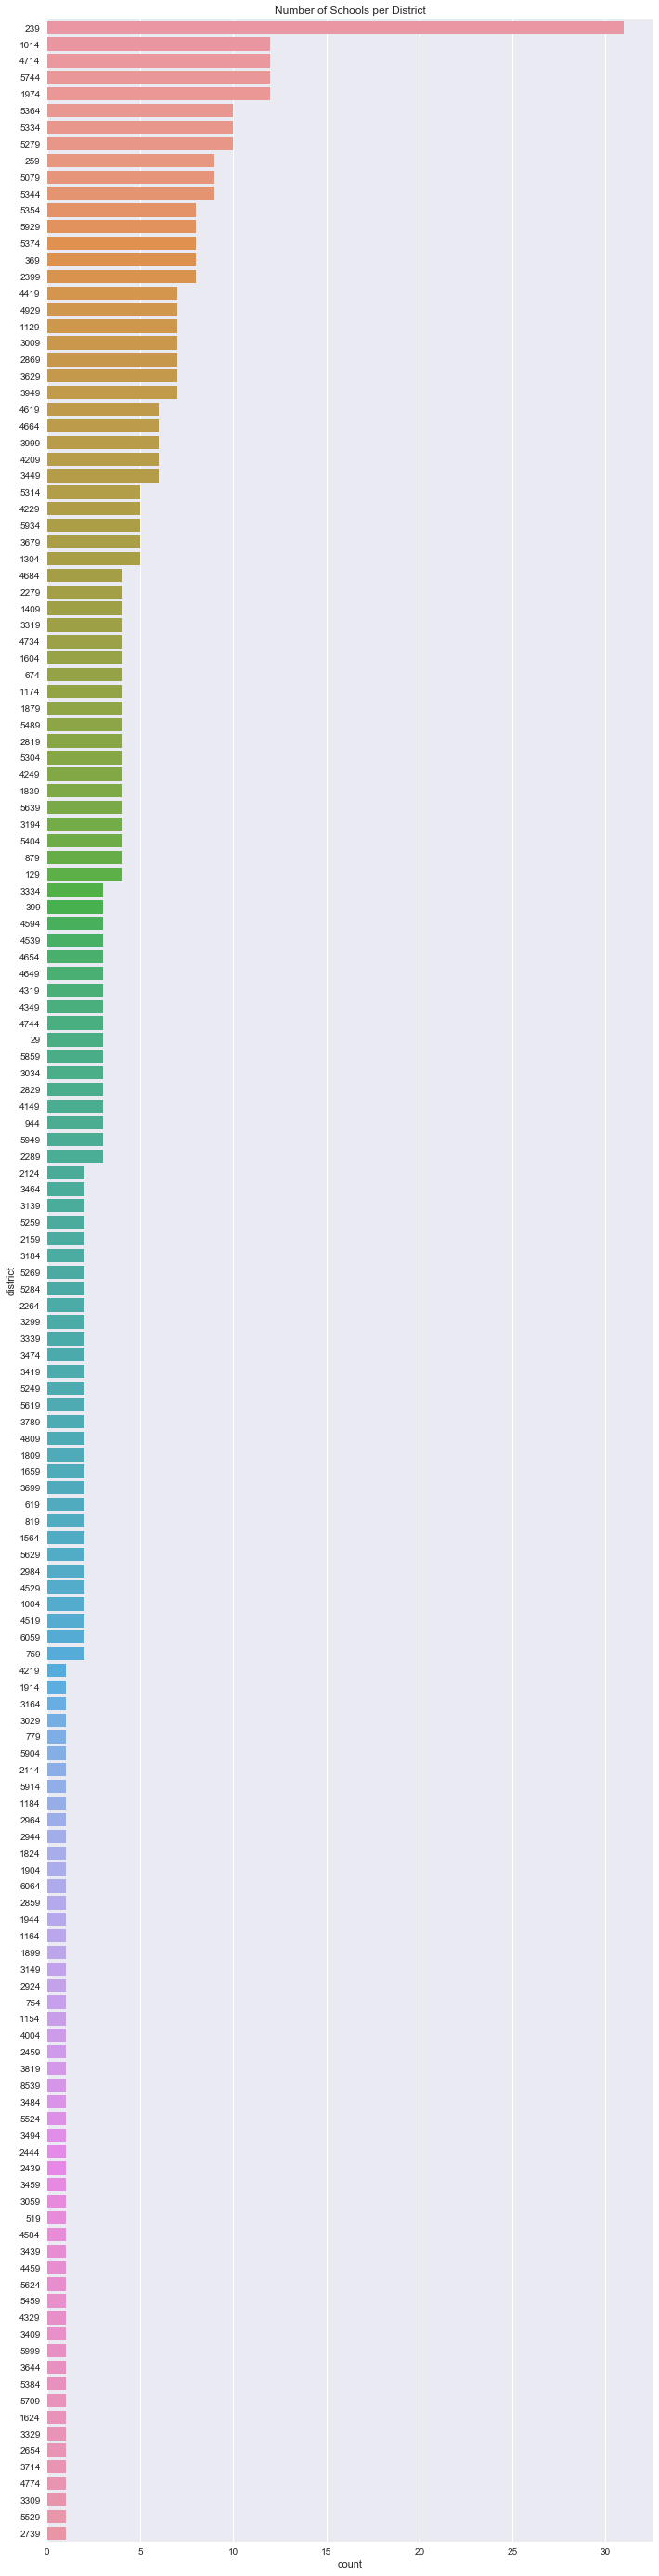

In [39]:
sns.set(rc={'figure.figsize':(11.7,50)})
p = sns.countplot(y = 'district', data = sdf, order = sdf['district'].value_counts().index).set_title('Number of Schools per District')


There seems to be a disproportionate number of schools per district represented in the dataset. District 239 has 31 schools while there are 53 other districts with only 1 school represented. This seems rather odd. I cannot tell from the information provided if this is normal, but from my general knowledge of school districts, I feel like there should be more than 1 school in a district and at least where I grew up, not 31 schools in a district. However, the information provided said that all schools in each treated district received treatment. Since the districts were the ones to implement this, maybe the districts did something wrong...

In [40]:
sdf.isnull().sum()

district               0
schl1                  0
enrollment             0
asian_pct             27
black_pct             27
hispanic_pct          27
white_pct             27
pct_frl               27
ed_lesshs              1
positive_env           0
mathscore_gain_std     0
dtype: int64

In [41]:
null_data = sdf[sdf.isnull().any(axis=1)]
print(null_data.shape)
print(null_data)

(28, 11)
     district  schl1  enrollment  asian_pct  black_pct  hispanic_pct  \
39       2159   1642         358        NaN        NaN           NaN   
67       4539   3738         268        NaN        NaN           NaN   
68       5859   6286         358        NaN        NaN           NaN   
81       1304   1054         200        NaN        NaN           NaN   
85       5334   5289         702        NaN        NaN           NaN   
88       1974   1462         300        NaN        NaN           NaN   
103      3999   3294         140        NaN        NaN           NaN   
144      4664   3766         355        NaN        NaN           NaN   
145      4249   3474         347        NaN        NaN           NaN   
148      4619   3830         675        NaN        NaN           NaN   
183      1659   1258         522        NaN        NaN           NaN   
187      2944   2426         725        NaN        NaN           NaN   
195       239    186         286        NaN        NaN 

In [42]:
df = pd.merge(ddf, sdf, left_on='corp1', right_on='district', how = 'outer')
df.head(16)

,corp1,treatment,district,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
0,29,1,29.0,30.0,329.0,0.003021,0.009063,0.096677,0.851964,0.379603,14.5,0.0,-0.457215
1,29,1,29.0,34.0,335.0,0.003135,0.003135,0.065831,0.815047,0.318885,14.5,0.0,-0.537477
2,29,1,29.0,2.0,233.0,0.000000,0.004237,0.042373,0.927966,0.300000,14.5,0.0,0.300080
3,129,1,129.0,38.0,499.0,0.038710,0.019355,0.019355,0.901075,0.018382,3.8,1.0,0.955901
4,129,1,129.0,64.0,507.0,0.054230,0.013015,0.019523,0.902386,0.003846,3.8,1.0,1.343666
5,129,1,129.0,61.0,383.0,0.020089,0.042411,0.022321,0.892857,0.031008,3.8,0.0,1.630452
6,129,1,129.0,39.0,531.0,0.032653,0.073469,0.030612,0.840816,0.028926,3.8,0.0,1.739707
7,239,0,239.0,155.0,514.0,0.017143,0.179048,0.032381,0.735238,0.349462,16.0,1.0,-0.846501
8,239,0,239.0,263.0,621.0,0.045662,0.242009,0.070015,0.563166,0.392366,16.0,0.0,-0.608421
9,239,0,239.0,146.0,452.0,0.047930,0.250545,0.032680,0.603486,0.423767,16.0,1.0,1.103983


In [43]:
df.shape

(524, 13)

After doing an outer join to merge both datasets there seems to be the the right expected number of data rows and columns. There were 4 districts that were in the districts dataset that were added on top of the 520 rows in the schools dataset. 

In [44]:
null_data = df[df.isnull().any(axis=1)]
print(null_data.shape)
print(null_data)

(32, 13)
     corp1  treatment  district   schl1  enrollment  asian_pct  black_pct  \
15     239          0     239.0   186.0       286.0        NaN        NaN   
65     754          1     754.0   622.0       610.0        NaN        NaN   
73     879          0     879.0   698.0       397.0        NaN        NaN   
98    1129          1    1129.0   916.0       232.0        NaN        NaN   
106   1304          1    1304.0  1054.0       200.0        NaN        NaN   
110   1304          1    1304.0  1058.0       229.0        NaN        NaN   
123   1659          1    1659.0  1258.0       522.0        NaN        NaN   
129   1839          0    1839.0  1334.0       314.0        NaN        NaN   
139   1974          0    1974.0  1462.0       300.0        NaN        NaN   
149   1974          0    1974.0  1478.0       243.0        NaN        NaN   
151   2044          1       NaN     NaN         NaN        NaN        NaN   
155   2159          1    2159.0  1642.0       358.0        NaN     

In [45]:
32/524

0.061068702290076333

### Summary of Missing Values in the Joined Dataframe

I wanted to make sure my joined dataset looked right. I previewed the 32 rows that had missing values in the new dataframe and everything seems correct. Rows with missing values account for about 6.11% of the total data. 4 of the rows only have data from the district dataset. There are 27 rows with only missing Race data (black, white, Asian, Hispanic) and percent free lunch. There is 1 row that only has missing local-area education level data. 

Before I try to find any anomolies in the data, I'm going to have to deal with the missing values first. 

In [46]:
df = pd.merge(ddf, sdf, left_on='corp1', right_on='district')
df.drop(['district'], axis=1, inplace=True)
df.shape

(520, 12)

I decided to get rid of the 4 data points that didn't have any school data because there was really no use for them in analyzing math performance when there is no data for it at all and because there was just 4 of them. I also dropped the `district` column as it is the same as the `corp1` column. 

For the rest of the missing values, I am going to replace them with a randomly generated number, who's mu value is set as the mean of the given column values and who's sigma value is set to the std of the given column values. This should be a good substitue for the missing data.

In [47]:
for column in df:
    print(column)

corp1
treatment
schl1
enrollment
asian_pct
black_pct
hispanic_pct
white_pct
pct_frl
ed_lesshs
positive_env
mathscore_gain_std


In [48]:
#create dictionary for mu,sigma of all columns that contain missing values
column_stat_table = {}

list_col = df.columns[df.isna().any()].tolist()
print(list_col)
for i in list_col:
    mean = np.nanmean(df[i])
    std = np.nanstd(df[i])
    name = i
    column_stat_table[name] = (mean, std)
        
pprint(column_stat_table)

#replace all missing values with a random number in the column's distribution
np.random.seed(1)
df.fillna(99999, inplace = True)
for column in df:
    if column in list_col:
        for tup in df[column].iteritems():
            val = tup[1]
            if val == 99999:
                mu = column_stat_table[column][0]
                std = column_stat_table[column][1]
                random_val = abs(np.random.normal(mu, std))
                df[column].replace(val, random_val, inplace=True)

['asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'pct_frl', 'ed_lesshs']
{'asian_pct': (0.01075677969979716, 0.020236213079422721),
 'black_pct': (0.081781314880324557, 0.14718297638478267),
 'ed_lesshs': (17.528130864973026, 6.4023793195403895),
 'hispanic_pct': (0.055240283257606493, 0.089825756735112949),
 'pct_frl': (0.33870936964097359, 0.18899462583584203),
 'white_pct': (0.81393108290872207, 0.21220774675443163)}


In [49]:
null_data = df[df.isnull().any(axis=1)]
print(null_data.shape)
print(null_data)
print(df.iloc[15])

(0, 12)
Empty DataFrame
Columns: [corp1, treatment, schl1, enrollment, asian_pct, black_pct, hispanic_pct, white_pct, pct_frl, ed_lesshs, positive_env, mathscore_gain_std]
Index: []
corp1                 239.000000
treatment               0.000000
schl1                 186.000000
enrollment            286.000000
asian_pct               0.043627
black_pct               0.055948
hispanic_pct            0.036476
white_pct               0.771329
pct_frl                 0.288396
ed_lesshs              16.000000
positive_env            0.000000
mathscore_gain_std     -0.057523
Name: 15, dtype: float64


Now that I've finished dealing with all the missing values, I will continue to explore the data. 

### Exploring the Data

I think that separating the data into two groups, treatment 1 and treatment 0 groups, will be the most helpful in evaluating the effectiveness of the program. I first want to retouch on the schools per district anomoly that I found earlier. 

In [ ]:
'''
Order to explore the data. 
1. Create correlation matrix
2. analyze all variables by comparing treatment 0 to treatment 1 groups


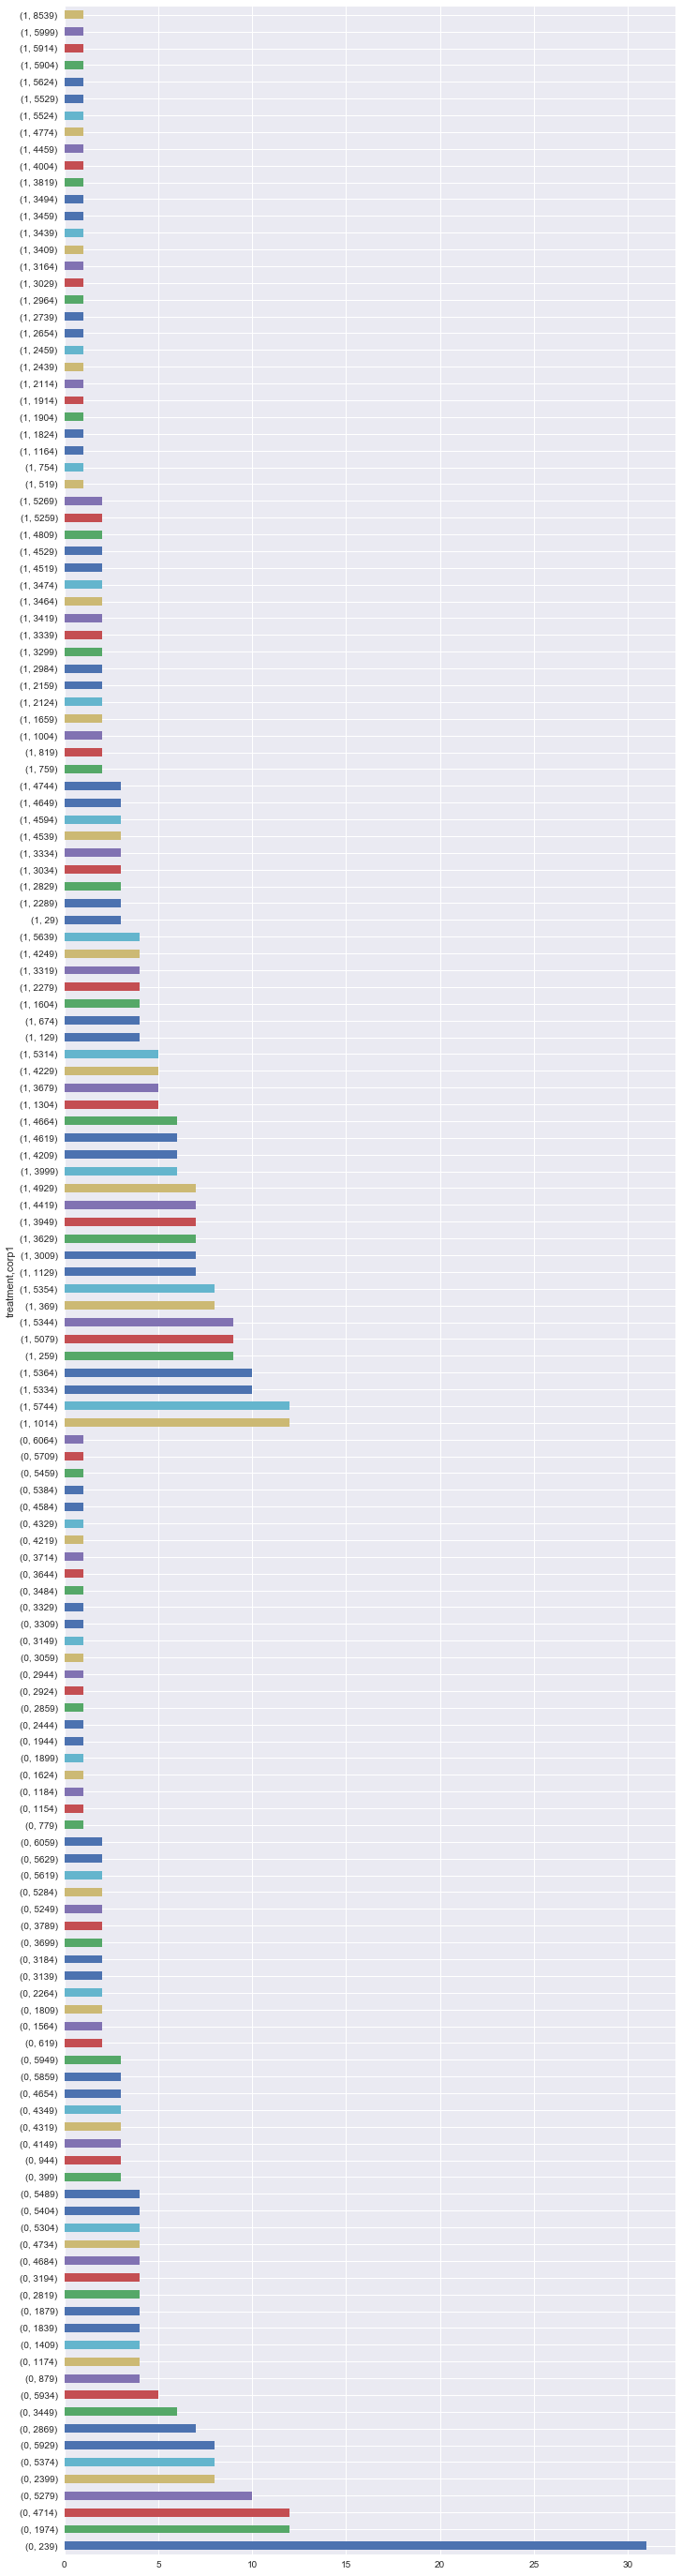

In [91]:
#find number of schools per district, grouped by treatment
a = df.groupby(['treatment'])['corp1'].value_counts()
a.plot(kind='barh')

Here I separated the two treatment groups and looked at the number of schools in each district. The distribution of schools per district still seems odd but at least both the treatment groups show a similar trend. This helps reinforce the notion that the treatment assignments by the researchers was random, even though they did assign 20 more districts to treatment 1. I'll continue to look for other clues.

In [102]:
#find number of schools per treatment group
a = df.groupby(['treatment'])['schl1'].count()
a
#a.plot(kind='bar')
b = ddf['treatment'].value_counts()
b

treatment
0    229
1    291
Name: schl1, dtype: int64

1    88
0    68
Name: treatment, dtype: int64

There are 291 schools in the treatment 1 group and 229 schools in treatment 0 group. This seems to be normal given there's 20 more treatment 1 districts than treatment 0 districts.

In [108]:
a = df.groupby(['treatment'])['enrollment', 'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'pct_frl', 'ed_lesshs', 'positive_env', 'mathscore_gain_std'].mean()
a

,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
treatment,,,,,,,,,
0,408.615721,0.010264,0.091761,0.073642,0.781051,0.393854,18.880943,0.371179,-0.314813
1,431.395189,0.014195,0.071531,0.039018,0.835853,0.290645,16.449828,0.326460,0.275373


I took the average over the rest of the variables, grouped by treatment to get a better high level look at the difference between the two groups.

Enrollment seems to be slightly higher at treatment 1 group schools. Asian percentage is similar with less than 1% more in treatment 1 group. There's about 2% more black students in treatment 0 group. There's about 3.4% more Hispanic students in treatment 0 group. There's about a 5.4% more white students in treatment 1 group. There's about 10% more students that are eligible for lunch subsidies in treatment 0. This seems to make sense as treatment 0 group has more Hispanic and black students. The percent of district local-area population with less than a HS diploma is about 2.4% higher in treatment 0 group. Treatment 0 has about .4% better rating in terms of average positive environment in those schools. The most striking difference is definitely the average standard gain in math score with treatment 0 at a LOSS of .31 and treatment 1 at a gain of .27. Although there are some demographic differences between the two treatment groups, there seems to be good supporting initial evidence that the treatment has some positive effect on student's math scores! 

(520, 12)


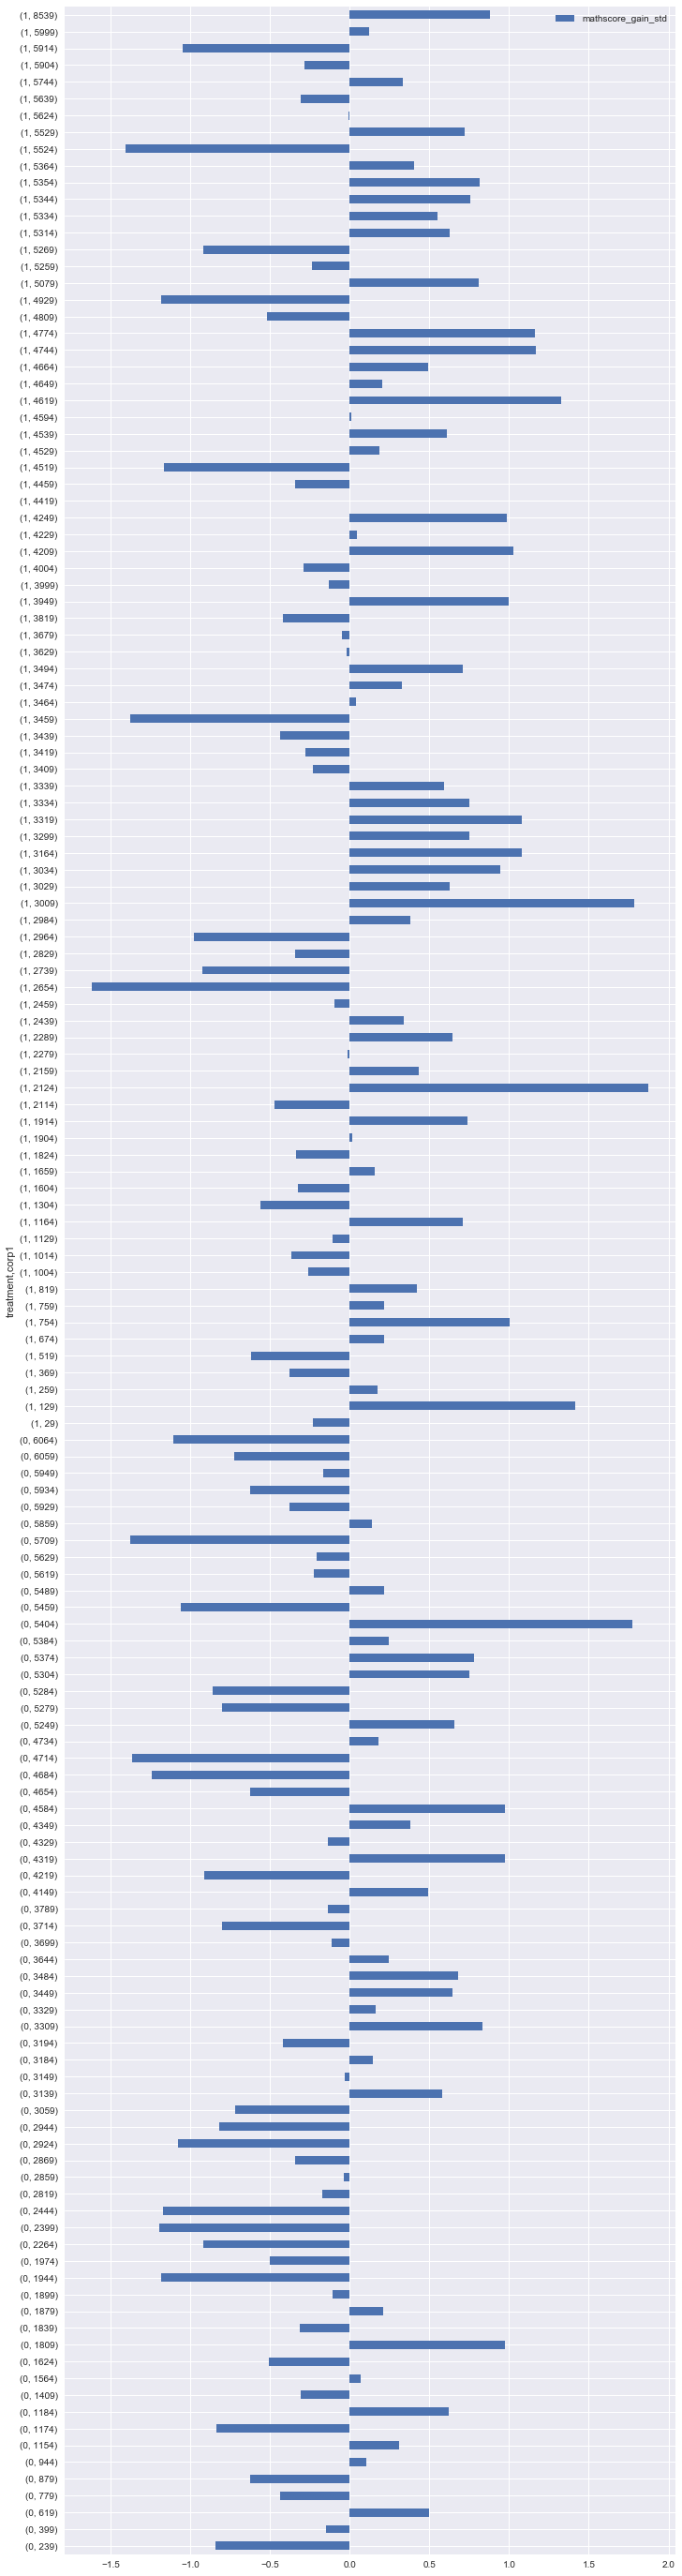

In [113]:

#for later analysis to see the mean columns per district

print(df.shape)
table = pd.pivot_table(df, index =['treatment','corp1'], values = ['mathscore_gain_std'], aggfunc=np.mean)
table.plot(kind='barh')
